<a href="https://colab.research.google.com/github/rhwji21/Music-Genre-Id/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Music Genre Identification:
Download file

In [ ]:
import pandas as pd
import gdown 
import numpy as np
import matplotlib as plt
import seaborn as sns 
#30 second data
gdown.download('https://drive.google.com/file/d/1g6iKCV69mEh9Tq8-XoxZlVYXNEIW7MYy/view?usp=sharing','./data30.csv')
#3 second data:
gdown.download('https://drive.google.com/file/d/14g4agZMftY9Q3fq6-AZeq72wyt4wx6Dw/view?usp=sharing','./data3.csv')

/usr/local/lib/python3.7/dist-packages/gdown/parse_url.py:39: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1g6iKCV69mEh9Tq8-XoxZlVYXNEIW7MYy
  url="https://drive.google.com/uc?id={}".format(file_id)
Downloading...
From: https://drive.google.com/file/d/1g6iKCV69mEh9Tq8-XoxZlVYXNEIW7MYy/view?usp=sharing
To: /content/data30.csv
69.5kB [00:00, 21.9MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/parse_url.py:39: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=14g4agZMftY9Q3fq6-AZeq72wyt4wx6Dw
  url="https://drive.google.com/uc?id={}".format(file_id)
Downloading...
From: https://drive.google.com/file/d/14g4agZMftY9Q3fq6-AZeq72wyt4wx6Dw/view?usp=sharing
To: /content/data3.csv
69.5kB [00:00, 22.8MB/s]


'./data3.csv'

In [ ]:
url_30 = 'https://drive.google.com/file/d/1g6iKCV69mEh9Tq8-XoxZlVYXNEIW7MYy/view?usp=sharing'
path_30 = 'https://drive.google.com/uc?export=download&id='+url_30.split('/')[-2]
data30_df = pd.read_csv(path_30)

url_3 = 'https://drive.google.com/file/d/1g6iKCV69mEh9Tq8-XoxZlVYXNEIW7MYy/view?usp=sharing'
path_3 = 'https://drive.google.com/uc?export=download&id='+url_3.split('/')[-2]
data3_df = pd.read_csv(path_3)

SVM 

In [ ]:
data30_df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [ ]:
data30_df.describe(include = 'all')

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
top,blues.00000.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blues
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,NaN,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,...,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096,NaN
std,NaN,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,...,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512,NaN
min,NaN,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,...,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583,NaN
25%,NaN,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,...,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865,NaN
50%,NaN,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,...,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117,NaN
75%,NaN,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,...,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374,NaN


In [ ]:
import numpy as np
npdata= data30_df.to_numpy()
labels = npdata[:, -1]
feats = npdata[:,1:-1]

feats = feats-np.min(feats,0)
feats = feats/np.max(feats,0)



In [ ]:
from sklearn.model_selection import train_test_split

columns30 = data30_df.columns
features = columns30[1:-1]

x = feats
y = labels

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1000)

In [ ]:
from sklearn import svm

svc = svm.SVC(kernel='rbf')
svc = svc.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

ytest_pred = svc.predict(x_test)
ytrain_pred = svc.predict(x_train)

print('Test accuracy:')
print(accuracy_score(ytest_pred, y_test))
print(confusion_matrix(y_test, ytest_pred))
print('Train accuracy:')
print(accuracy_score(ytrain_pred, y_train))
confusion_matrix(y_train, ytrain_pred)



Test accuracy:
0.72
[[11  0  1  0  0  1  0  0  0  1]
 [ 0 19  0  0  0  0  0  0  0  0]
 [ 1  0 17  2  0  1  0  0  0  3]
 [ 0  0  0 14  2  0  0  1  1  5]
 [ 1  0  0  1  7  0  0  0  5  0]
 [ 1  1  0  1  0 23  0  1  1  1]
 [ 1  0  0  1  0  0 15  0  0  1]
 [ 0  0  0  2  0  0  0 16  2  1]
 [ 0  0  1  2  3  0  0  1 17  0]
 [ 3  0  1  1  1  0  3  0  0  5]]
Train accuracy:
0.78375


array([[69,  0,  4,  1,  1,  3,  4,  0,  0,  4],
       [ 0, 79,  1,  0,  0,  1,  0,  0,  0,  0],
       [ 4,  0, 51,  8,  0,  2,  0,  2,  2,  7],
       [ 2,  1,  0, 53,  2,  0,  6,  0,  2, 11],
       [ 2,  0,  1,  8, 60,  0,  3,  5,  7,  0],
       [ 2,  4,  0,  2,  0, 62,  0,  0,  0,  1],
       [ 2,  0,  0,  1,  0,  0, 77,  0,  0,  2],
       [ 0,  0,  4,  4,  1,  0,  0, 68,  0,  2],
       [ 3,  1,  3,  0,  2,  0,  2,  3, 58,  4],
       [ 8,  0,  2, 10,  0,  4,  7,  0,  5, 50]])

In [ ]:
svc = svm.SVC(kernel='poly')
svc = svc.fit(x_train, y_train)

In [ ]:
ytest_pred = svc.predict(x_test)
ytrain_pred = svc.predict(x_train)

print('Test accuracy:')
print(accuracy_score(ytest_pred, y_test))
print(confusion_matrix(y_test, ytest_pred))
print('Train accuracy:')
print(accuracy_score(ytrain_pred, y_train))
confusion_matrix(y_train, ytrain_pred)

Test accuracy:
0.74
[[11  0  1  0  0  1  0  0  0  1]
 [ 0 18  1  0  0  0  0  0  0  0]
 [ 1  0 17  1  0  0  0  0  1  4]
 [ 0  0  2 14  3  0  0  1  1  2]
 [ 0  0  1  1  6  0  0  0  6  0]
 [ 1  1  1  2  0 23  0  0  1  0]
 [ 1  0  0  1  0  0 14  0  0  2]
 [ 0  0  0  2  0  0  0 17  2  0]
 [ 0  0  0  4  2  0  0  0 18  0]
 [ 0  0  1  2  0  0  1  0  0 10]]
Train accuracy:
0.93625


array([[81,  0,  0,  0,  0,  0,  2,  0,  0,  3],
       [ 0, 81,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0, 67,  0,  0,  1,  0,  0,  0,  4],
       [ 0,  0,  0, 73,  1,  0,  0,  1,  1,  1],
       [ 2,  0,  0,  2, 79,  0,  2,  0,  1,  0],
       [ 0,  2,  0,  0,  0, 69,  0,  0,  0,  0],
       [ 1,  0,  0,  1,  0,  0, 79,  0,  0,  1],
       [ 0,  0,  2,  2,  0,  0,  0, 73,  0,  2],
       [ 0,  0,  1,  1,  1,  0,  1,  0, 70,  2],
       [ 1,  0,  0,  6,  0,  0,  1,  0,  1, 77]])

In [ ]:
svc = svm.SVC(kernel='sigmoid')
svc = svc.fit(x_train, y_train)

In [ ]:
ytest_pred = svc.predict(x_test)
ytrain_pred = svc.predict(x_train)

print('Test accuracy:')
print(accuracy_score(ytest_pred, y_test))
print(confusion_matrix(y_test, ytest_pred))
print('Train accuracy:')
print(accuracy_score(ytrain_pred, y_train))
confusion_matrix(y_train, ytrain_pred)

Test accuracy:
0.045
[[ 3  0  0  0 10  0  0  0  0  1]
 [ 1  1  0  0 17  0  0  0  0  0]
 [ 3  0  0  0 15  0  0  0  0  6]
 [ 0  0  0  0  9  0  0  0  0 14]
 [ 1  1  0  0  1  0  0  0  0 11]
 [ 1  1  0  0 24  0  0  0  0  3]
 [ 0  0  0  0  6  0  0  0  0 12]
 [ 2  4  0  0  3  0  0  0  0 12]
 [ 6  2  0  0  1  0  0  0  0 15]
 [ 3  0  0  0  7  0  0  0  0  4]]
Train accuracy:
0.04875


array([[12,  2,  0,  0, 53,  0,  0,  0,  0, 19],
       [ 3,  4,  0,  0, 74,  0,  0,  0,  0,  0],
       [11,  2,  0,  0, 50,  0,  0,  0,  0, 13],
       [ 2,  2,  0,  0, 36,  0,  0,  0,  0, 37],
       [14,  6,  0,  0,  5,  0,  0,  0,  0, 61],
       [ 4,  3,  0,  0, 56,  0,  0,  0,  0,  8],
       [ 1,  0,  0,  0, 25,  0,  0,  0,  0, 56],
       [ 2, 11,  0,  0, 19,  0,  0,  0,  0, 47],
       [13, 14,  0,  0, 21,  0,  0,  0,  0, 28],
       [ 5,  1,  0,  0, 62,  0,  0,  0,  0, 18]])

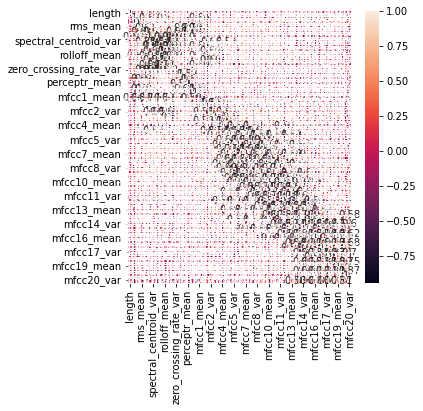

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



correlation_matrix = data30_df[features].corr().round(2)
plt.figure(figsize=(5,5))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

mean_cols size: 28


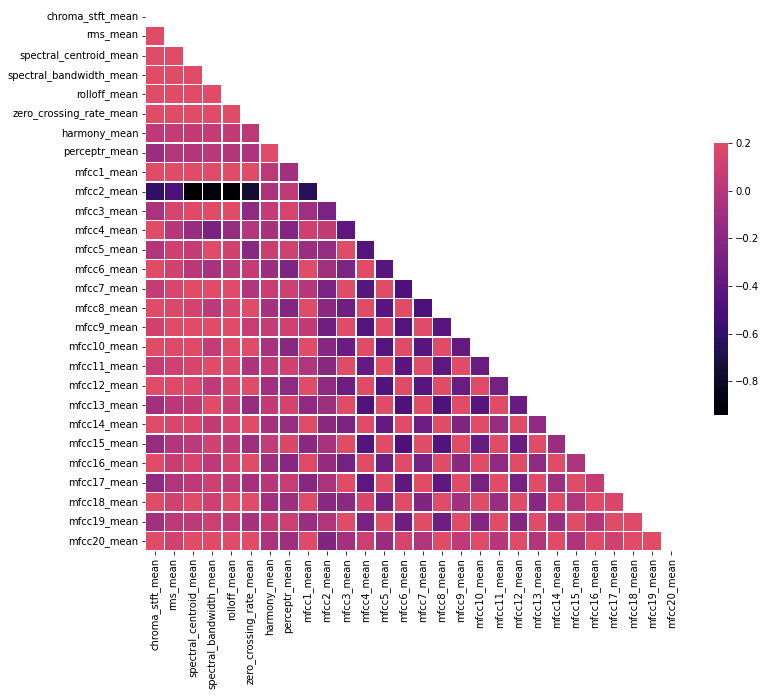

In [ ]:
mean_cols = [col for col in data30_df.columns if 'mean' in col]
corr = data30_df[mean_cols].corr()

mask = np.triu(np.ones_like(corr,  dtype = bool))
plt.figure(figsize = (12, 10))
print("mean_cols size:", len(mean_cols))
sns.heatmap(data = corr, mask = mask, vmax =.2, cmap = 'magma', linewidths = .5, center = 0, cbar_kws={"shrink": .5})
plt.show()

KeyError: ignored

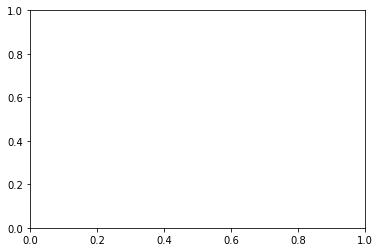

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(data30_df.iloc[:, 1:3])
data30_df.iloc[:, 1:3] = imputer.transform(data30_df.iloc[:, 1:3])

X = data30_df[1:2]  # we only take the first two features.
y = data30_df['label']

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

svc = svm.SVC(kernel='sigmoid')
svc = svc.fit(x_train, y_train)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
# Set-up grid for plotting.
X0, X1 = X[0], X[:1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
X = columns30[1:3]  # we only take the first three features.
Y = data30_df['label']

#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

IndexError: ignored